In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
from matplotlib.ticker import ScalarFormatter

Importing libraries

In [30]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

Connecting to relevant Databases

In [31]:
cursor = conn.cursor()

In [32]:
query = '''
SELECT 
    CASE
        WHEN CountryRegionCode = 'US' THEN 'US'
        ELSE Name
    END AS Region,
    SUM(SalesYTD) AS TotalSalesYTD, 
    SUM(SalesLastYear) AS TotalSalesLastYear
FROM Sales.SalesTerritory
GROUP BY 
    CASE
        WHEN CountryRegionCode = 'US' THEN 'US'
        ELSE Name
    END
'''

The SQL query needed 

In [33]:
salesdata = pd.read_sql(query, conn)
print(salesdata.round())

           Region  TotalSalesYTD  TotalSalesLastYear
0       Australia      5977815.0           2278549.0
1          Canada      6771829.0           5693989.0
2          France      4772398.0           2396540.0
3         Germany      3805202.0           1307950.0
4  United Kingdom      5012905.0           1635823.0
5              US     26411060.0          19402505.0


C:\Users\eagua\AppData\Local\Temp\ipykernel_6816\3525693327.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


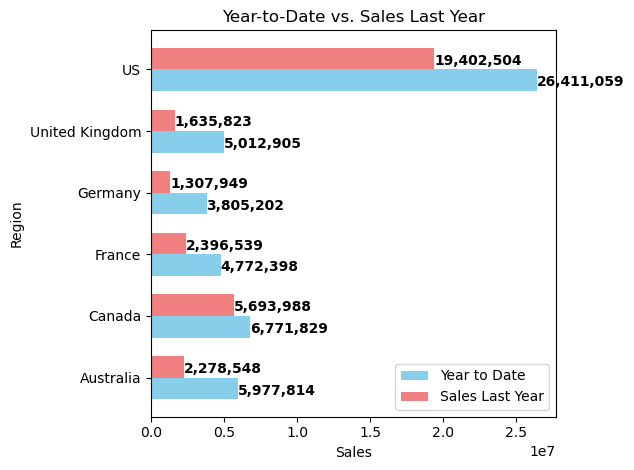

In [34]:
year_to_date = 'TotalSalesYTD'
sales_last_year = 'TotalSalesLastYear'

# Create the plot
fig, ax = plt.subplots()

# Define the height of the bars for side-by-side placement
bar_height = 0.35

# Create a numerical index for plotting
index = range(len(salesdata))

# Plot the data side by side using the numerical index
bar1 = ax.barh(index, salesdata[year_to_date], bar_height, label='Year to Date', color='skyblue')
bar2 = ax.barh([i + bar_height for i in index], salesdata[sales_last_year], bar_height, label='Sales Last Year', color='lightcoral')

# Set the tick positions and labels for the numerical index
ax.set_yticks([i + bar_height/2 for i in index])
ax.set_yticklabels(salesdata['Region'])

# Add labels and title
ax.set_ylabel('Region')
ax.set_xlabel('Sales')
ax.set_title('Year-to-Date vs. Sales Last Year')

# Add a legend
ax.legend()

# Add data labels with regular notation
def format_sales_label(x):
    return f'{int(x):,}'

for i, v in enumerate(salesdata[year_to_date]):
    ax.text(v + 500, i - 0.1, format_sales_label(v), color='black', fontweight='bold')

for i, v in enumerate(salesdata[sales_last_year]):
    ax.text(v + 500, i + bar_height - 0.1, format_sales_label(v), color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Creates and Formats the Barchart the way I wanted. (All the 'US' data is combined, as a horizontal barchart. Selected colours, labels and axis on the graph)

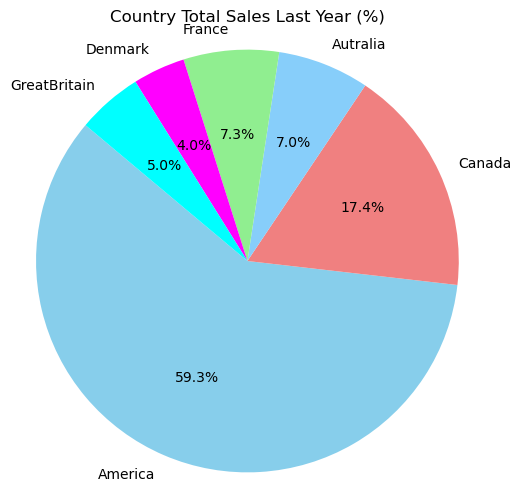

In [35]:
import matplotlib.pyplot as plt

labels = ['America', 'Canada', 'Autralia', 'France', 'Denmark', 'GreatBritain']
sizes = [59.3, 17.4, 7, 7.3, 4, 5]  # These should add up to 100% for a valid pie chart
colors = ['skyblue', 'lightcoral', 'lightskyblue', 'lightgreen', 'magenta', 'cyan']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Country Total Sales Last Year (%)')

# Show the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Code for Pie Chart: Sales Last Year

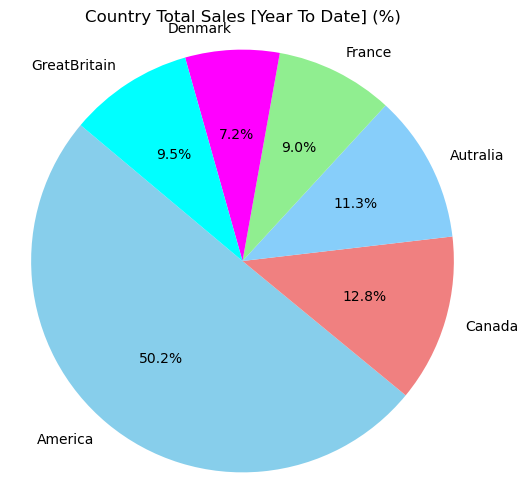

In [36]:
import matplotlib.pyplot as plt

labels = ['America', 'Canada', 'Autralia', 'France', 'Denmark', 'GreatBritain']
sizes = [50.1, 12.8, 11.3, 9.0, 7.2, 9.5]  # These should add up to 100% for a valid pie chart
colors = ['skyblue', 'lightcoral', 'lightskyblue', 'lightgreen', 'magenta', 'cyan']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Country Total Sales [Year To Date] (%)')

# Show the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Code for Pie Chart: Sales Year to Date